# Example of the aitlas toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the aitlas toolbox.

## Import the required packages

In [2]:
from aitlas.datasets import WHUMixDataset
from aitlas.utils import image_loader
from aitlas.models import DeepLabV3
from aitlas.transforms import MinMaxNormTranspose

## Visualize images and masks

Total number of patches: 39346


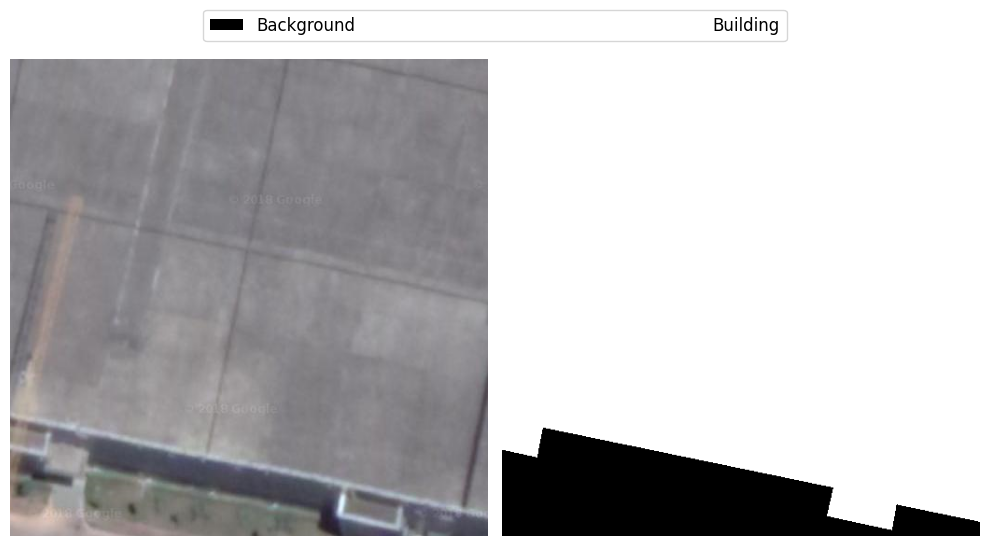

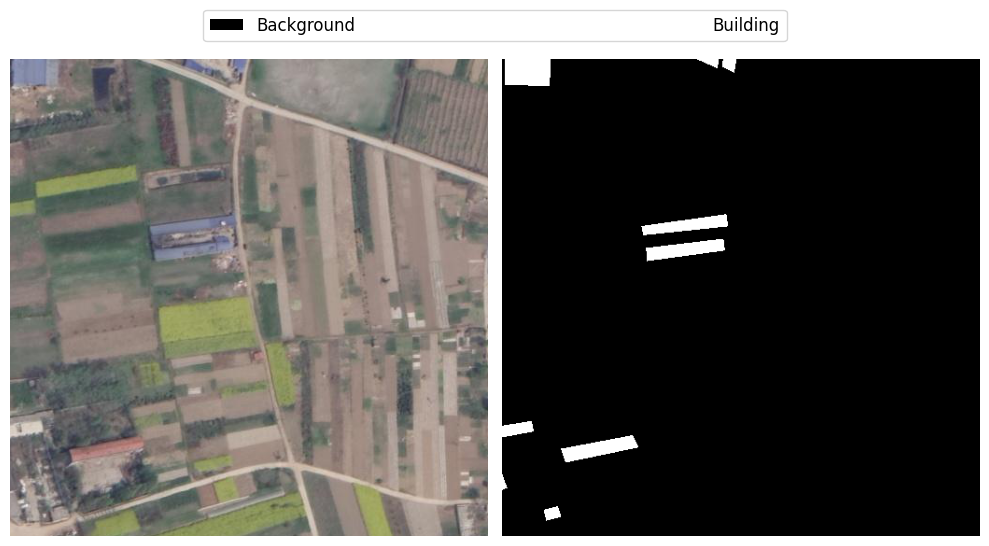

In [2]:
dataset_config = {
    "data_dir": "/home/dragik/data/semseg/buildings/WHUMix/./train/"
}
dataset = WHUMixDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(1);
dataset.show_image(26);

In [3]:
dataset.data_distribution_table()

,Number of pixels
Background,9.122473e+09
Building,1.178735e+09


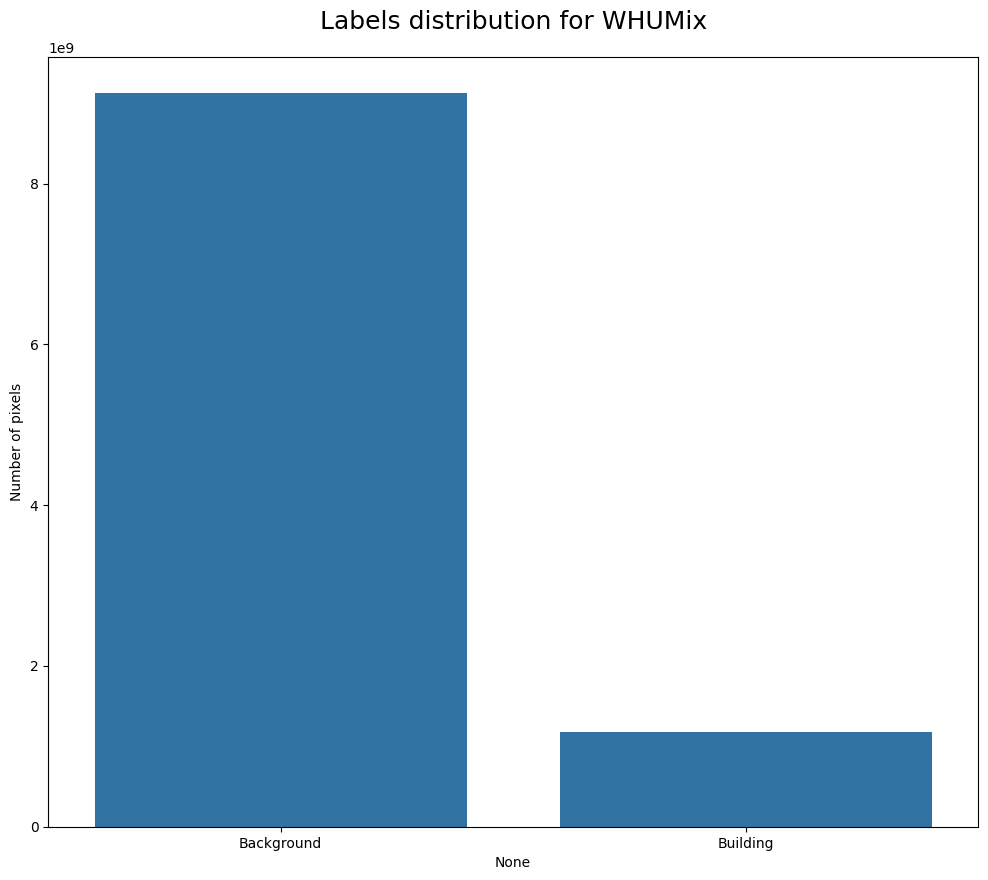

In [4]:
dataset.data_distribution_barchart();

## Load the training data ##

In [8]:
train_dataset_config = {
    "batch_size": 8,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/buildings/WHUMix/./train",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
train_dataset = WHUMixDataset(train_dataset_config)
len(train_dataset)

39346

## Create the model ##

In [9]:
epochs = 5
model_directory = "/home/dragik/data/semseg/buildings/WHUMix/experiments"
model_config = {
    "num_classes": 2, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training ##

In [10]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

2024-05-08 11:38:40,430 INFO Starting training.
training: 100%|█████████████████████████████████████████████████████████████████████| 4918/4918 [27:10<00:00,  3.02it/s]
2024-05-08 12:05:50,875 INFO epoch: 1, time: 1630, loss:  0.06256
testing on train set: 100%|█████████████████████████████████████████████████████████| 4918/4918 [07:50<00:00, 10.46it/s]
2024-05-08 12:13:42,150 INFO IOU:0.9390629005744412, IOU mean:0.8615095885567573, IOU per Class:[0.96522853 0.75779065]
training: 100%|█████████████████████████████████████████████████████████████████████| 4918/4918 [27:00<00:00,  3.03it/s]
2024-05-08 12:40:42,897 INFO epoch: 2, time: 1620, loss:  0.03419
testing on train set: 100%|█████████████████████████████████████████████████████████| 4918/4918 [07:56<00:00, 10.32it/s]
2024-05-08 12:48:39,478 INFO IOU:0.9458816210934832, IOU mean:0.8720553685167988, IOU per Class:[0.96911934 0.7749914 ]
training: 100%|█████████████████████████████████████████████████████████████████████| 4918/4918 

## Evaluate the model ##

In [11]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/buildings/WHUMix/./val",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}

test_dataset = WHUMixDataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "/home/dragik/data/semseg/buildings/WHUMix/experiments/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

2024-05-09 06:46:37,853 INFO Loading checkpoint /home/dragik/data/semseg/buildings/WHUMix/experiments/checkpoint.pth.tar
2024-05-09 06:46:38,389 INFO Loaded checkpoint /home/dragik/data/semseg/buildings/WHUMix/experiments/checkpoint.pth.tar at epoch 6
testing on test set: 100%|██████████████████████████████████████████████████████████| 1095/1095 [00:57<00:00, 18.90it/s]


[{'IOU': 0.9492880523959196,
  'IOU mean': 0.8825001088119636,
  'IOU per Class': array([0.97112869, 0.79387153])}]

## Predictions ##

2024-05-09 06:47:42,342 INFO Loading checkpoint /home/dragik/data/semseg/buildings/WHUMix/experiments/checkpoint.pth.tar
2024-05-09 06:47:42,800 INFO Loaded checkpoint /home/dragik/data/semseg/buildings/WHUMix/experiments/checkpoint.pth.tar at epoch 6


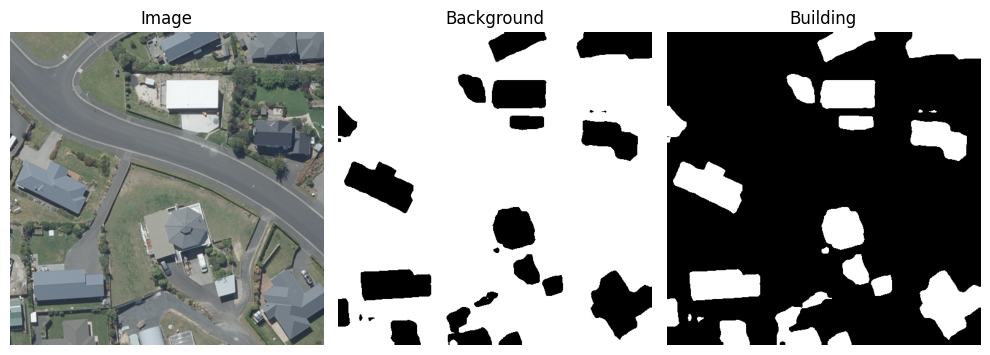

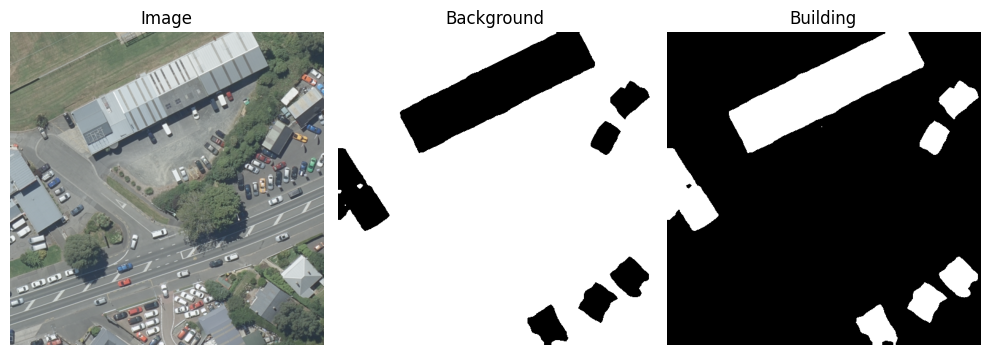

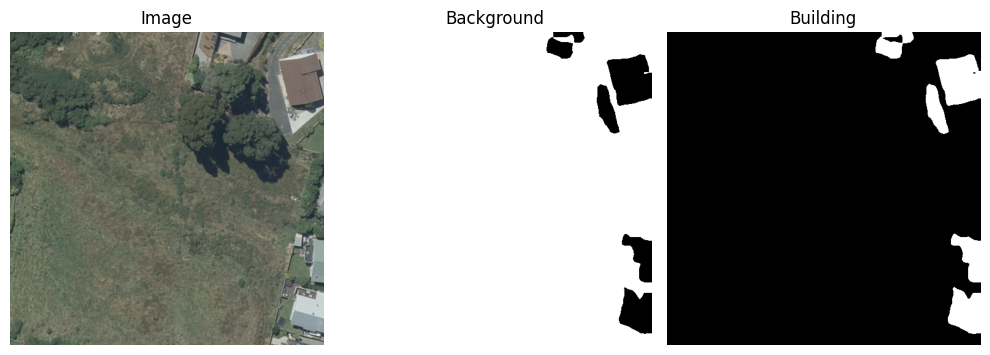

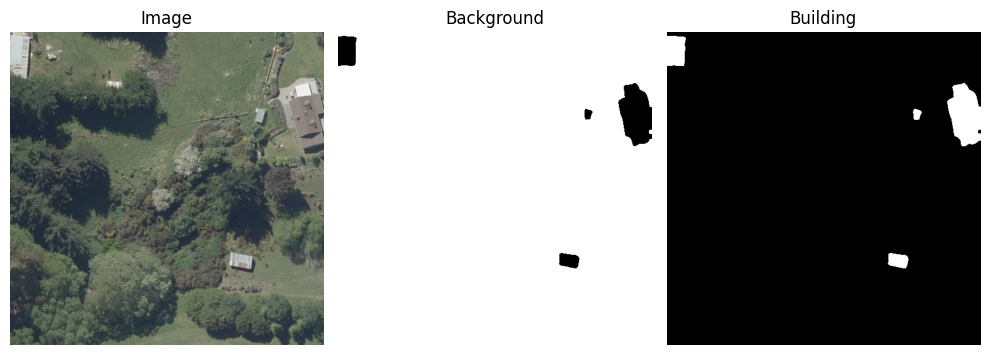

In [12]:
model_path = "/home/dragik/data/semseg/buildings/WHUMix/experiments/checkpoint.pth.tar"
labels = ["Background","Building"]
transform = MinMaxNormTranspose()
model.load_model(model_path)

image = image_loader('/home/dragik/data/semseg/buildings/WHUMix/img_dir/test/dunedin_1.tif')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/buildings/WHUMix/img_dir/test/dunedin_36.tif')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/buildings/WHUMix/img_dir/test/dunedin_94.tif')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/buildings/WHUMix/img_dir/test/dunedin_144.tif')
fig = model.predict_masks(image, labels, transform)